In [2]:
import numpy as np
from sympy import ntheory
from sympy.ntheory import continued_fraction_reduce
import matplotlib.pyplot as plt

In [34]:
def getOrtho(circ1,circ2):
    r1,x1 = circ1 
    r2,x2 = circ2
    c1 = x1**2-r1**2
    c2 = x2**2-r2**2
    x3 = (c1-c2)/(2*(h1-h2))
    r3 = np.sqrt(h**2+2*x1*h+c1)
    return (r3, x3)

def getDist(circ1,circ2):
    circ1,circ2 = getInv(circ1), getInv(circ2)
    t1,u1,v1 = circ1
    t2,u2,v2 = circ2
    return np.arccosh(t1*u2/2+t2*u1/2-v1*v2)
    
def normalToInv(circ):
    r,x = circ
    return ((x**2-r**2)/r, 1/r, x/r)

def InvToNormal(circ):
    t,u,v = circ
    r = 1/u
    x = r*v
    return (r,x)

def shear(pant1, pant2):
    i,j = -1,-1
    for g in range(3):
        for y in range(3):
            if pant1(g)==minPermutation(pant2(y)[::-1]):
                i,j = g,y
    if not i==-1:
        a = ntheory.continued_fraction_reduce([list(pant1(g))])
        a_bar = -1/ntheory.continued_fraction_reduce([list(pant1(g))][::-1])
        sign = (a-a_bar)/abs(a-a_bar)
        if sign == -1:
            temp = pants1
            pants1 = pants2
            pants2 = temp
        

SyntaxError: unexpected EOF while parsing (<ipython-input-34-3cb41d1e82da>, line 34)

In [9]:
def isOdd(sequence):
    return len(sequence) % 2

In [32]:
def permutationsOf(sequence):
    return list(permutationsOfGen(sequence))

In [33]:
def permutationsOfGen(sequence):
    for n in range(0, len(sequence), 1 if isOdd(sequence) else 2):
        yield rotl(sequence, n)

In [31]:
def minPermutation(sequence):
    return min(permutationsOfGen(sequence))

In [10]:
def inv(lr_sequence):
    return tuple((np.array(lr_sequence[::-1]) - 1) ** 2)

In [11]:
def pairToFrac2(s1,s2):
    return recover2(list(s1) + [1] + list(inv(s2)) + [1])

In [12]:
def recover2(ls):
    output = []
    i = 0
    while i < len(ls):
        counter = 1
        while (i < len(ls) - 1 and ls[i] == ls[i + 1]):
            i += 1
            counter += 1
        i += 1
        output.append(counter)
    if isOdd(output):  
        output = [0]+output
    return output

In [13]:
import sympy as sp

def pantsInPlane(pants):
    circles = []
    s0,s1,s2 = pants
    y0 = pairToFrac2(s0,s1)
    y1 = pairToFrac2(s1,s2)
    y2 = pairToFrac2(s2,s0)
    B = lambda x : 1/(1-x)
    
    alpha = ntheory.continued_fraction_reduce([y0])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y0[::-1]]))
    x_min = B(alpha_conj+1)
    x_max = B(alpha+1)
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    
    alpha = ntheory.continued_fraction_reduce([y1])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y1[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    
    alpha = ntheory.continued_fraction_reduce([y2])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y2[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    x_min = B(B(x_min))
    x_max = B(B(x_max))
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    return circles
    
    

In [53]:
def plotPants(pants):
    fig, ax = plt.subplots()
    
    circ1, circ2, circ3 = pantsInPlane(pants)
    minimum = -1+min(circ1[1]-abs(circ1[0]), circ2[1]-abs(circ2[0]), circ3[1]-abs(circ3[0]))
    maximum = 1+max(circ1[1]+abs(circ1[0]), circ2[1]+abs(circ2[0]), circ3[1]+abs(circ3[0]))
    ax.set_xlim(float(minimum),float(maximum))
    ax.set_ylim(0, float(max(abs(circ1[0]), abs(circ2[0]), abs(circ3[0]))+1))
    
    circle1 = plt.Circle((circ1[1],0), abs(circ1[0]), fill = False, color = 'r')
    circle2 = plt.Circle((circ2[1],0), abs(circ2[0]), fill = False, color = 'g')
    circle3 = plt.Circle((circ3[1],0), abs(circ3[0]), fill = False, color = 'b')
    
    if circ1[0]>0:
        plt.plot(circ1[1], abs(circ1[0]), '>', color=  'r')
    else:
        plt.plot(circ1[1], abs(circ1[0]), '<', color=  'r')
    if circ2[0]>0:
        plt.plot(circ2[1], abs(circ2[0]), '>', color=  'g')
    else:
        plt.plot(circ2[1], abs(circ2[0]), '<', color=  'g')
    if circ3[0]>0:
        plt.plot(circ3[1], abs(circ3[0]), '>', color=  'b')
    else:
        plt.plot(circ3[1], abs(circ3[0]), '<', color=  'b')
    
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.set_aspect('equal', adjustable='box')

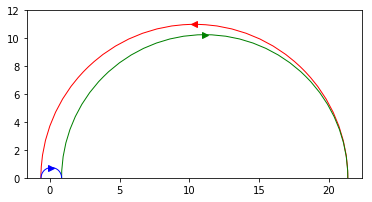

In [57]:
plotPants(([0,1,0,1,1], [0]*20+[1,1,0,1,1,0,1,0], [0]*5+[1,1,1,0,1,0]))

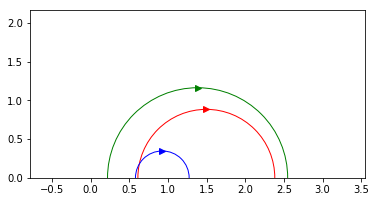

In [63]:
plotPants2(([0,1,1,0,1,0], [0,1,0,1,1],[1,1,1,0,1,0]))

In [17]:
a = ntheory.continued_fraction_reduce([[1,3,4,3]]).evalf()+1

In [18]:
a_conj = -1/ntheory.continued_fraction_reduce([[3,4,3,1]]).evalf()+1

In [111]:
pantsInPlane(([0,1,1],[0,0,1,1,1,1],[0,0,1,1,1]))

[(0.809173593712687, 1.50000000000000),
 (-1.88549782307388, 1.42857142857143),
 (0.690065559342354, 0.e-126)]

In [47]:
recover2([1,1,0,0,0,1,1,1,0,0,1])

[0, 2, 3, 3, 2, 1]

In [49]:
recover2([1,1,0,1])

[0, 2, 1, 1]

In [59]:
import sympy as sp

def pantsInPlane2(pants):
    circles = []
    s0,s1,s2 = pants
    y0 = pairToFrac2(s0,s1)
    y1 = pairToFrac2(s1,s2)
    y2 = pairToFrac2(s2,s0)
    B = lambda x : 1/(1-x)
    
    alpha = ntheory.continued_fraction_reduce([y0])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y0[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    
    alpha = ntheory.continued_fraction_reduce([y1])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y1[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    
    alpha = ntheory.continued_fraction_reduce([y2])
    alpha_conj = -1/(ntheory.continued_fraction_reduce([y2[::-1]]))
    x_min = alpha_conj+1
    x_max = alpha+1
    r = (x_max-x_min)/2
    r = r.evalf()
    x = (x_min+x_max)/2
    x = x.evalf()
    circles.append((r,x))
    return circles
    
def plotPants2(pants):
    fig, ax = plt.subplots()
    
    circ1, circ2, circ3 = pantsInPlane2(pants)
    minimum = -1+min(circ1[1]-abs(circ1[0]), circ2[1]-abs(circ2[0]), circ3[1]-abs(circ3[0]))
    maximum = 1+max(circ1[1]+abs(circ1[0]), circ2[1]+abs(circ2[0]), circ3[1]+abs(circ3[0]))
    ax.set_xlim(float(minimum),float(maximum))
    ax.set_ylim(0, float(max(abs(circ1[0]), abs(circ2[0]), abs(circ3[0]))+1))
    
    circle1 = plt.Circle((circ1[1],0), abs(circ1[0]), fill = False, color = 'r')
    circle2 = plt.Circle((circ2[1],0), abs(circ2[0]), fill = False, color = 'g')
    circle3 = plt.Circle((circ3[1],0), abs(circ3[0]), fill = False, color = 'b')
    
    if circ1[0]>0:
        plt.plot(circ1[1], abs(circ1[0]), '>', color=  'r')
    else:
        plt.plot(circ1[1], abs(circ1[0]), '<', color=  'r')
    if circ2[0]>0:
        plt.plot(circ2[1], abs(circ2[0]), '>', color=  'g')
    else:
        plt.plot(circ2[1], abs(circ2[0]), '<', color=  'g')
    if circ3[0]>0:
        plt.plot(circ3[1], abs(circ3[0]), '>', color=  'b')
    else:
        plt.plot(circ3[1], abs(circ3[0]), '<', color=  'b')
        
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.set_aspect('equal', adjustable='box')

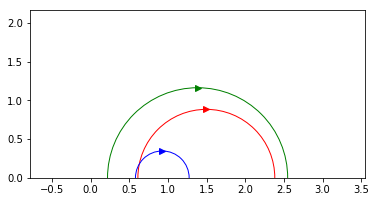

In [60]:
plotPants2(([0,1,1,0,1,0],[0,1,0,1,1],[1,1,1,0,1,0]))

In [93]:
np.linalg.inv(np.array([[0,1],[-1,1]]))

array([[ 1., -1.],
       [ 1.,  0.]])

In [ ]:
(z-1)/z